<a href="https://colab.research.google.com/github/jiin124/Deep_learning/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패션 MNIST 데이터 불러오기

데이터 스케일을 0~255 사이에서 0~1 사이로 바꾸고 훈련 세트와 검증 세트로 나눈다. 
여기에서 한가지 작업이 다르다. 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 했지만 이 작업을 위해 넘파이 reshape메서드를 사용하거나 flatten 클래스를 사용했다. 합성곱 신경망은 2차원 이미지를 그대로 사용하기 떄문에 이렇게 일렬로 펼치지 않기로 했다. 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled=train_input.reshape(-1,28,28,1)/255.0

train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                              padding='same',input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

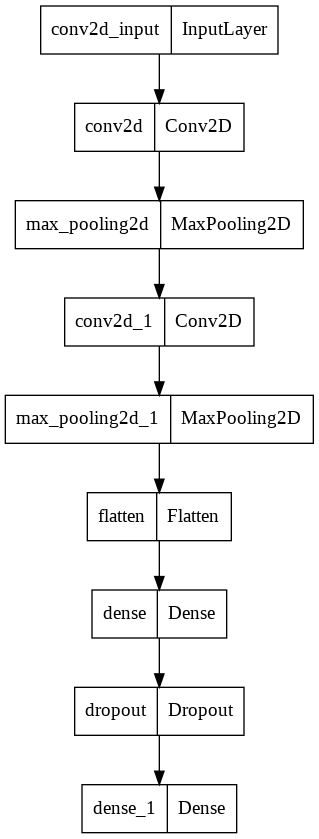

In [7]:
keras.utils.plot_model(model)

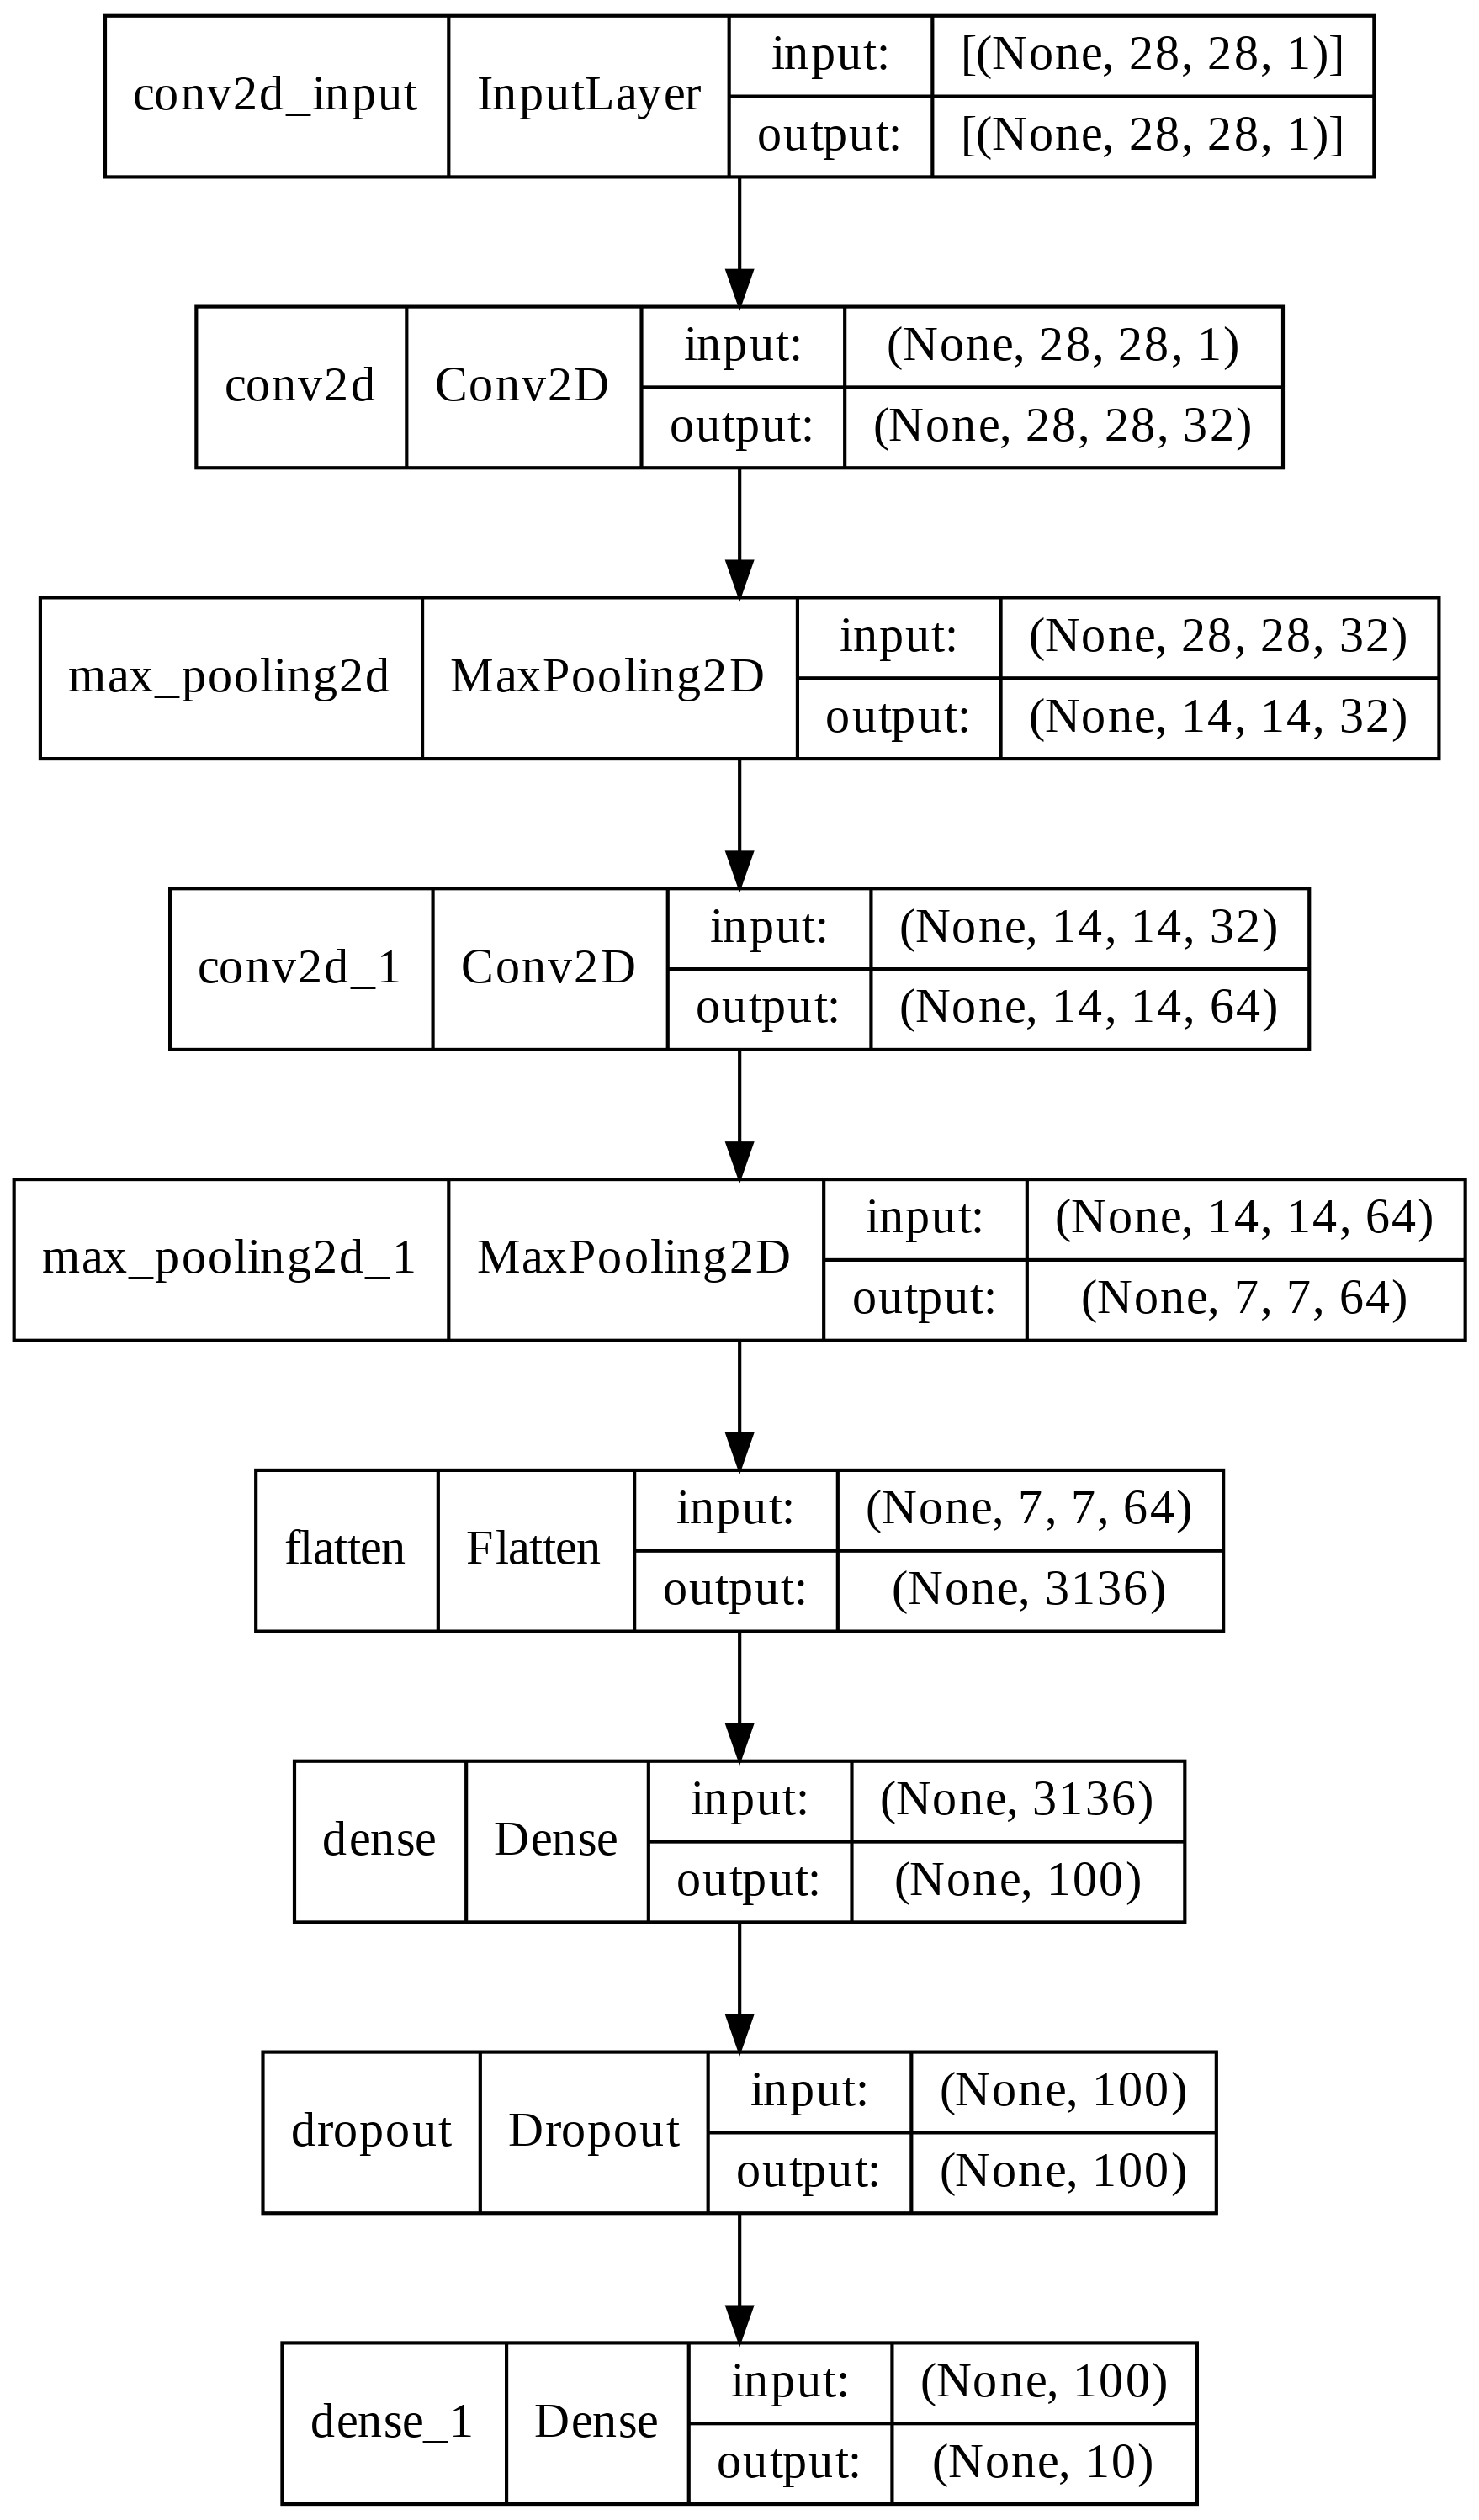

In [8]:
keras.utils.plot_model(model,show_shapes=True,
                       to_file='cnn-architecture.png',dpi=300)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,
                                                restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 59s 39ms/step - loss: 0.5209 - accuracy: 0.8154 - val_loss: 0.3302 - val_accuracy: 0.8759
Epoch 2/20
1500/1500 [==============================] - 58s 39ms/step - loss: 0.3472 - accuracy: 0.8749 - val_loss: 0.2821 - val_accuracy: 0.8917
Epoch 3/20
1500/1500 [==============================] - 58s 38ms/step - loss: 0.2995 - accuracy: 0.8927 - val_loss: 0.2677 - val_accuracy: 0.8994
Epoch 4/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2714 - accuracy: 0.9021 - val_loss: 0.2412 - val_accuracy: 0.9070
Epoch 5/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2451 - accuracy: 0.9101 - val_loss: 0.2569 - val_accuracy: 0.9053
Epoch 6/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2240 - accuracy: 0.9183 - val_loss: 0.2271 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 57s 38ms/step - loss: 0.2082 - accuracy: 0.9226 - val_loss: 0.2276 -

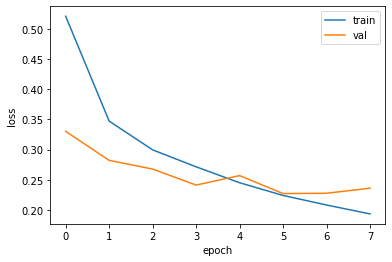

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2271 - accuracy: 0.9147


[0.22711972892284393, 0.9146666526794434]

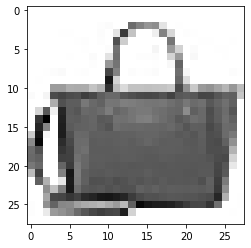

In [12]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [13]:
preds=model.predict(val_scaled[0:1])
print(preds)

[[5.1822229e-13 1.3435247e-21 5.9058521e-15 8.0276199e-14 4.6929125e-14
  4.7019324e-15 8.2879557e-15 3.1600550e-14 1.0000000e+00 1.6774149e-15]]


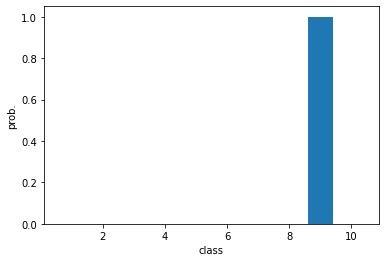

In [14]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈',
         '가방','앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [18]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2453 - accuracy: 0.9134


[0.24530671536922455, 0.9133999943733215]

# 합성곱 신경망의 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 **커널**이라 부르는 **가중치와 절편**을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 있지 않다. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다. 

예를 들어 다음과 같은 가중치는 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만들것이다.

## 가중치 시각화

In [20]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [24]:
model.layers

In [25]:
#첫번째 합성곱 층의 가중치 조사. 
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [26]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.04326325 0.27944565


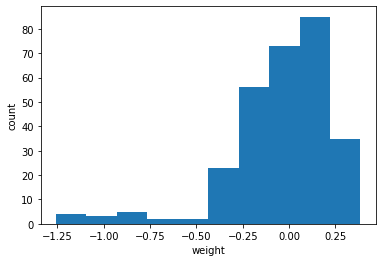

In [27]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

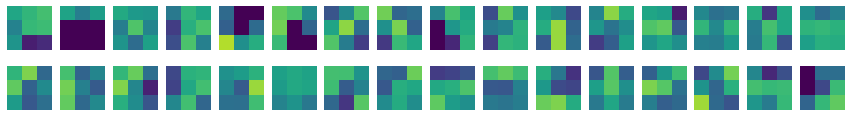

In [28]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [29]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',
                                          padding='same',input_shape=(28,28,1)))

In [30]:
#모델의 첫번째 층의 가중치를 no_training_conv변수에 저장
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [31]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

0.0011878065 0.0828275


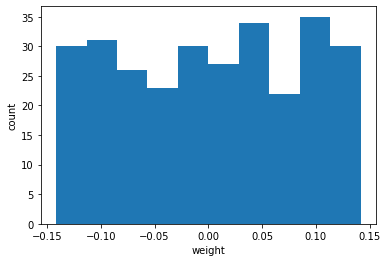

In [32]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

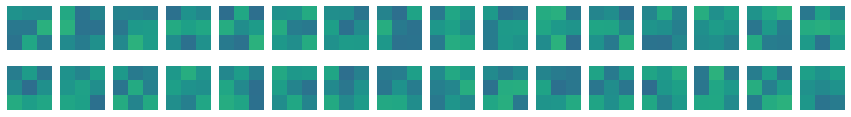

In [33]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,
                    vmax=0.5)
    axs[i,j].axis('off')
plt.show()

## 함수형 API



In [36]:
dense1=keras.layers.Dense(100,activation='sigmoid')
dense2=keras.layers.Dense(10,activation='softmax')

In [39]:
inputs=keras.Input(shape=(784,))

In [40]:
hidden=dense1(inputs)


In [41]:
outputs=dense2(hidden)

In [42]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [43]:
conv_acti=keras.Model(model.input,model.layers[0].output)

## 특성 맵 시각화

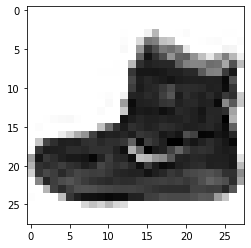

In [44]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [45]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

In [46]:
print(feature_maps.shape)

(1, 28, 28, 32)


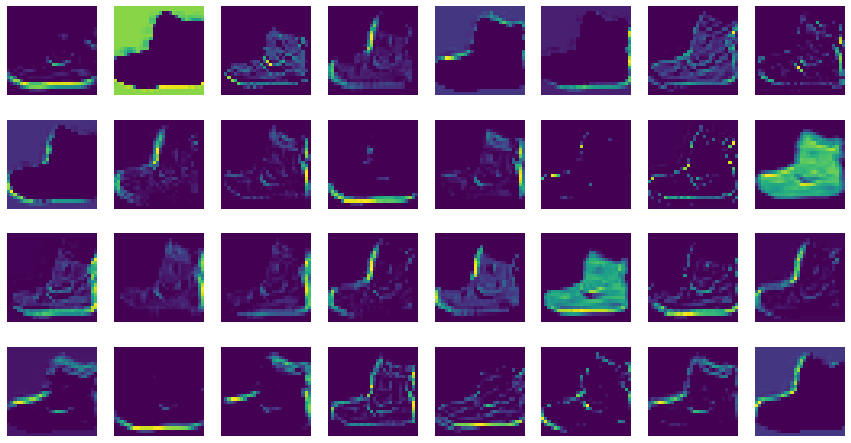

In [47]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [48]:
conv2D_acti=keras.Model(model.input,model.layers[2].output)


In [49]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2D_acti.predict(inputs)

In [50]:
print(feature_maps.shape)

(1, 14, 14, 64)


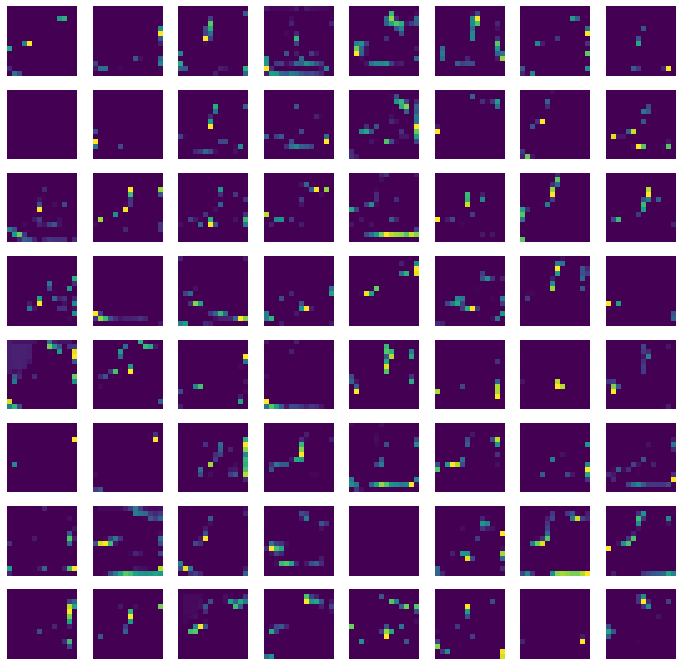

In [51]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()